# Welly Location Data Plotting

## Importing Libraries & Data

In [1]:
from welly import Location
from welly import Well
import pandas as pd

In [2]:
data = Well.from_las('Netherlands Data/L05-15-Spliced.las')

/Users/andy/opt/anaconda3/lib/python3.8/site-packages/welly/well.py:193: FutureWarning: From v0.5 the default will be 'original', keeping whatever is used in the LAS file. If you want to force conversion to metres, change your code to use `index='m'`.
  warnings.warn(m, FutureWarning)


In [3]:
data

Well(uwi: '', 25 curves: ['BHT', 'CAL', 'CHT', 'CN', 'CNC', 'CNCQH', 'CNQH', 'GR', 'MBVI', 'MBVM', 'MCBW', 'MPHE', 'MPHS', 'MPRM', 'PEQH', 'PORZ', 'PORZC', 'TEN', 'TTEN', 'WTBH', 'ZCORQH', 'ZDEN', 'ZDENQH', 'ZDNC', 'ZDNCQH'])

In [4]:
data.data

{'BHT': Curve([nan, nan, nan, ..., nan, nan, nan]),
 'CAL': Curve([nan, nan, nan, ..., nan, nan, nan]),
 'CHT': Curve([nan, nan, nan, ..., nan, nan, nan]),
 'CN': Curve([nan, nan, nan, ..., nan, nan, nan]),
 'CNC': Curve([nan, nan, nan, ..., nan, nan, nan]),
 'CNCQH': Curve([nan, nan, nan, ..., nan, nan, nan]),
 'CNQH': Curve([nan, nan, nan, ..., nan, nan, nan]),
 'GR': Curve([nan, nan, nan, ..., nan, nan, nan]),
 'MBVI': Curve([nan, nan, nan, ..., nan, nan, nan]),
 'MBVM': Curve([nan, nan, nan, ..., nan, nan, nan]),
 'MCBW': Curve([nan, nan, nan, ..., nan, nan, nan]),
 'MPHE': Curve([nan, nan, nan, ..., nan, nan, nan]),
 'MPHS': Curve([nan, nan, nan, ..., nan, nan, nan]),
 'MPRM': Curve([nan, nan, nan, ..., nan, nan, nan]),
 'PEQH': Curve([nan, nan, nan, ..., nan, nan, nan]),
 'PORZ': Curve([nan, nan, nan, ..., nan, nan, nan]),
 'PORZC': Curve([nan, nan, nan, ..., nan, nan, nan]),
 'TEN': Curve([nan, nan, nan, ..., nan, nan, nan]),
 'TTEN': Curve([nan, nan, nan, ..., nan, nan, nan]),


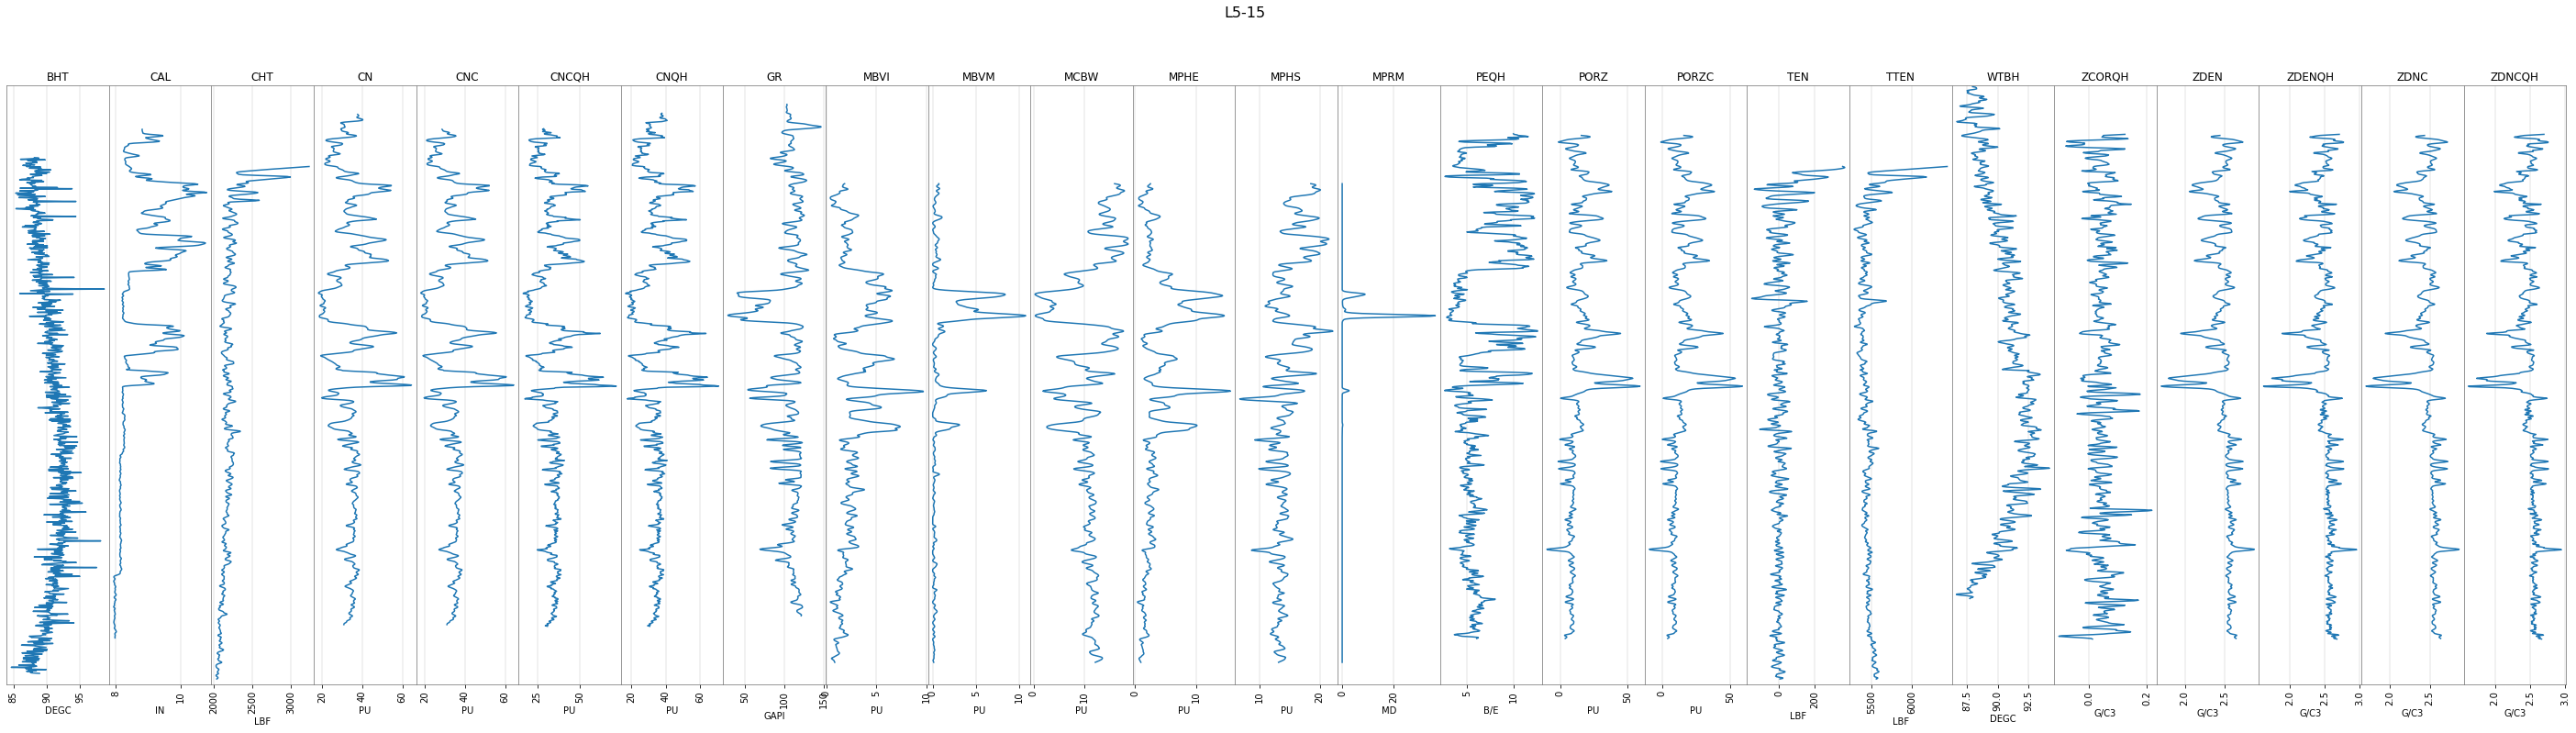

In [5]:
data.plot(extents='curves')

## Importing Survey Data
Survey data is commonly measured at irregular intervals during the drilling process. It gives a snapshot of the measured depth, inclination and azimuth at the time of the survey. From this, we can calculated the True Vertical Depth, x-offset and y-offset from the origin point of the well.

In [6]:
survey = pd.read_csv('Netherlands Data/L05-15-Survey.csv')

In [7]:
survey

,MD,INC,AZI,TVD,X-offset,Y-offset
0,0.00,0.00,0.00,0.00,0.00,0.00
1,89.30,0.00,0.00,89.30,0.00,0.00
2,142.10,2.31,323.48,142.09,-0.63,0.86
3,170.20,3.89,319.12,170.14,-1.59,2.03
4,197.90,5.86,315.60,197.74,-3.20,3.75
...,...,...,...,...,...,...
107,3121.82,22.52,202.44,3013.36,-271.20,-620.33
108,3149.93,23.35,203.30,3039.24,-275.46,-630.42
109,3178.92,23.82,204.05,3065.81,-280.12,-641.04
110,3192.32,24.12,204.96,3078.06,-282.38,-646.00


Welly requires the survey data to contain MD - measured depth, INC - inclination and AZI - azimuth. This allows the library to calculate the TVD, X-offset and Y-offset.

We can subset the data by using the square brackets and passing in a list of the column names.

In [8]:
survey_subset = survey[['MD', 'INC', 'AZI']]

In [9]:
survey_subset

,MD,INC,AZI
0,0.00,0.00,0.00
1,89.30,0.00,0.00
2,142.10,2.31,323.48
3,170.20,3.89,319.12
4,197.90,5.86,315.60
...,...,...,...
107,3121.82,22.52,202.44
108,3149.93,23.35,203.30
109,3178.92,23.82,204.05
110,3192.32,24.12,204.96


## Adding Survey Data to Welly Well
After the survey data has been loaded from a CSV file, we need to calculate our location parameters. By default welly is set to calculate these using the minimum curvature method, which is the most common and most accurate method for this purpose. More information can be found at https://petrowiki.spe.org/Calculation_methods_for_directional_survey

In [10]:
#Add deviation data to a well
data.location.add_deviation(survey_subset.values)

Now that the survey data has been loaded in, and attached to the well, we can call upon `data.location.position` to view the data. 

The data is formatted as: X-offset, Y-offset and TVD.

In [11]:
#View first five rows of the data
data.location.position[:5]

array([[  0.        ,   0.        ,   0.        ],
       [  0.        ,   0.        ,  89.3       ],
       [ -0.6333253 ,   0.8552655 , 142.08569704],
       [ -1.59422229,   2.03112298, 170.14372544],
       [ -3.19869524,   3.75201703, 197.74222054]])

We can extract each of the location parameters into variables by slicing up the array. This is done using square brakcets and selecting all rows using the colon (:) followed by the column within the array.

In [12]:
x_loc = data.location.position[:,0]
y_loc = data.location.position[:,1]
z_loc = data.location.position[:,2]

In [13]:
z_loc

array([   0.        ,   89.3       ,  142.08569704,  170.14372544,
        197.74222054,  225.68858529,  254.17872844,  282.83986178,
        311.3294853 ,  339.82739229,  368.42706739,  396.92691062,
        425.62638313,  454.22551155,  482.42473573,  511.12342097,
        539.72042719,  568.21483874,  597.00539705,  625.8900492 ,
        654.36614119,  683.22656973,  711.6691264 ,  740.00649462,
        767.54748074,  797.06893638,  825.36408467,  853.83548556,
        882.30553194,  910.5784206 ,  939.03148052,  967.35658945,
        995.56380403, 1023.95695144, 1052.22740711, 1080.54668678,
       1108.68959153, 1136.6589388 , 1164.87003188, 1192.91335907,
       1220.78632672, 1248.71483434, 1276.69724251, 1304.38501765,
       1332.02759325, 1359.48829109, 1386.59399864, 1413.47807554,
       1440.51055639, 1467.37758752, 1494.27990524, 1521.15255355,
       1547.94826077, 1574.81148851, 1601.67556214, 1628.46190115,
       1655.38744119, 1682.77094459, 1709.94467279, 1737.02953

In [14]:
data.location.tvd

array([   0.        ,   89.3       ,  142.08569704,  170.14372544,
        197.74222054,  225.68858529,  254.17872844,  282.83986178,
        311.3294853 ,  339.82739229,  368.42706739,  396.92691062,
        425.62638313,  454.22551155,  482.42473573,  511.12342097,
        539.72042719,  568.21483874,  597.00539705,  625.8900492 ,
        654.36614119,  683.22656973,  711.6691264 ,  740.00649462,
        767.54748074,  797.06893638,  825.36408467,  853.83548556,
        882.30553194,  910.5784206 ,  939.03148052,  967.35658945,
        995.56380403, 1023.95695144, 1052.22740711, 1080.54668678,
       1108.68959153, 1136.6589388 , 1164.87003188, 1192.91335907,
       1220.78632672, 1248.71483434, 1276.69724251, 1304.38501765,
       1332.02759325, 1359.48829109, 1386.59399864, 1413.47807554,
       1440.51055639, 1467.37758752, 1494.27990524, 1521.15255355,
       1547.94826077, 1574.81148851, 1601.67556214, 1628.46190115,
       1655.38744119, 1682.77094459, 1709.94467279, 1737.02953

## Creating Location Plots
To understand the position of the well, we can call upon three plots.  
The first plots the x and y offset and gives us a top down view / map view of the well path.  
The next two plots show us how the well changes in the x location versus TVD and the y location versus TVD.

Text(0.5, 1.0, 'Y Location vs TVD')

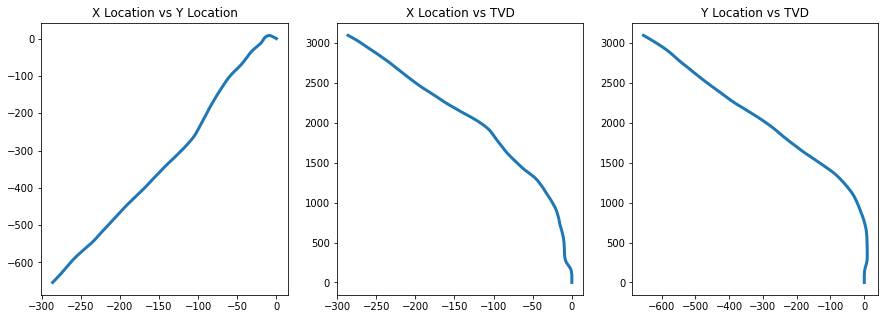

In [15]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(15,5))
ax1 = plt.subplot2grid(shape=(1,3), loc=(0,0))
ax2 = plt.subplot2grid(shape=(1,3), loc=(0,1))
ax3 = plt.subplot2grid(shape=(1,3), loc=(0,2))

ax1.plot(x_loc, y_loc, lw=3)
ax1.set_title('X Location vs Y Location')

ax2.plot(x_loc, z_loc, lw=3)
ax2.set_title('X Location vs TVD')

ax3.plot(y_loc, z_loc, lw=3)
ax3.set_title('Y Location vs TVD')

### Add Markers for Start of the Well & End of the Well
We can add a couple of markers to our plot to show the starting location (black square) and the end location (red star) of the well.  
Additionally, for the plots with TVD, we can understand them better if we invert the y-axis using `ax.invert_yaxis()`

Text(0.5, 1.0, 'Y Location vs TVD')

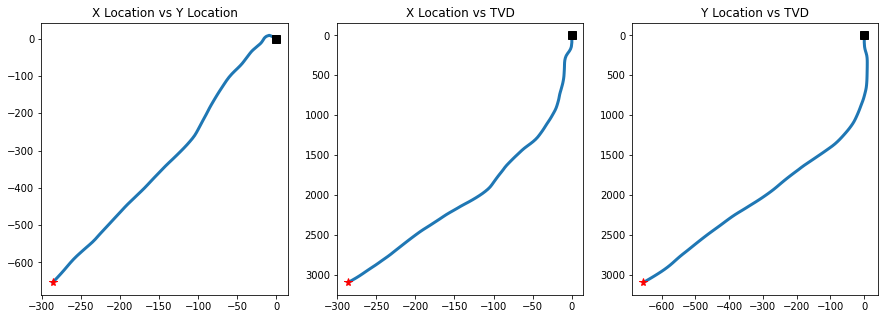

In [16]:
fig, ax = plt.subplots(figsize=(15,5))
ax1 = plt.subplot2grid(shape=(1,3), loc=(0,0))
ax2 = plt.subplot2grid(shape=(1,3), loc=(0,1))
ax3 = plt.subplot2grid(shape=(1,3), loc=(0,2))

ax1.plot(x_loc, y_loc, lw=3)
ax1.plot(x_loc[0], y_loc[0], marker='s', color='black', ms=8)
ax1.plot(x_loc[-1], y_loc[-1], marker='*', color='red', ms=8)
ax1.set_title('X Location vs Y Location')

ax2.plot(x_loc, z_loc, lw=3)
ax2.plot(x_loc[0], z_loc[0], marker='s', color='black', ms=8)
ax2.plot(x_loc[-1], z_loc[-1], marker='*', color='red', ms=8)
ax2.invert_yaxis()
ax2.set_title('X Location vs TVD')

ax3.plot(y_loc, z_loc, lw=3)
ax3.plot(y_loc[0], z_loc[0], marker='s', color='black', ms=8)
ax3.plot(y_loc[-1], z_loc[-1], marker='*', color='red', ms=8)
ax3.invert_yaxis()
ax3.set_title('Y Location vs TVD')


### Compare Against Original Survey
We are fortunate enough to have a survey file that contains the location parameters and TVD, so we can do a quick check with what Welly has calculated and the ones contained within the CSV file.

Text(0.5, 1.0, 'X Location vs TVD')

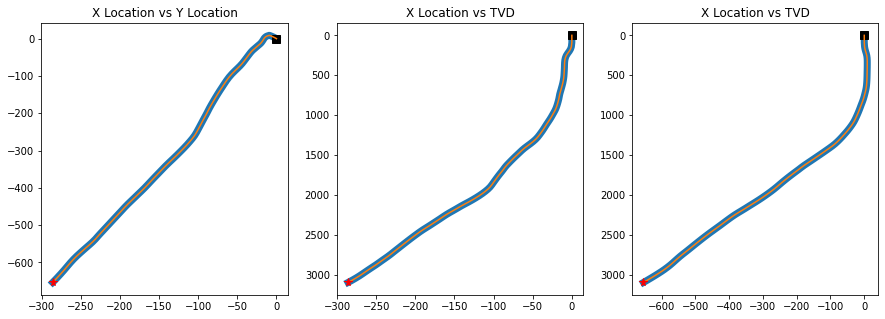

In [17]:
fig, ax = plt.subplots(figsize=(15,5))
ax1 = plt.subplot2grid(shape=(1,3), loc=(0,0))
ax2 = plt.subplot2grid(shape=(1,3), loc=(0,1))
ax3 = plt.subplot2grid(shape=(1,3), loc=(0,2))

ax1.plot(x_loc, y_loc, lw=7)
ax1.plot(x_loc[0], y_loc[0], marker='s', color='black', ms=8)
ax1.plot(survey['X-offset'], survey['Y-offset'])
ax1.plot(x_loc[-1], y_loc[-1], marker='*', color='red', ms=8)
ax1.set_title('X Location vs Y Location')

ax2.plot(x_loc, z_loc, lw=7)
ax2.plot(x_loc[0], z_loc[0], marker='s', color='black', ms=8)
ax2.plot(survey['X-offset'], survey['TVD'])
ax2.plot(x_loc[-1], z_loc[-1], marker='*', color='red', ms=8)
ax2.invert_yaxis()
ax2.set_title('X Location vs TVD')

ax3.plot(y_loc, z_loc, lw=7)
ax3.plot(y_loc[0], z_loc[0], marker='s', color='black', ms=8)
ax3.plot(survey['Y-offset'], survey['TVD'])
ax3.plot(y_loc[-1], z_loc[-1], marker='*', color='red', ms=8)
ax3.invert_yaxis()
ax3.set_title('X Location vs TVD')



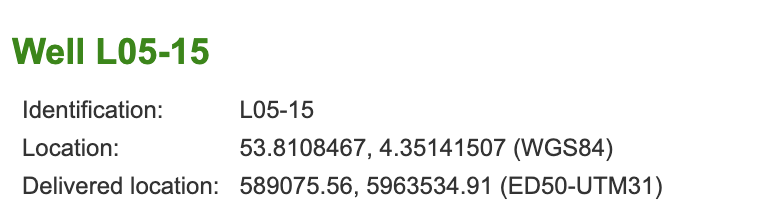

### Create 3D Plot of Well Path
Rather than viewing the data in two dimensions, we can view it in three dimensions using matplotlib. But first we have to calculate continuous data. This is done by using `location.trajectory()`. Here we can provide a datum, i.e the UTM co-ordinates of the well location at surface, and a vertical offset.

In [18]:
# Create a trajectory of regularly sampled points
location_data = data.location.trajectory(datum=[589075.56, 5963534.91, 0], elev=False)

In [19]:
xs = location_data[:,0]
ys = location_data[:,1]
zs = location_data[:,2]

In [20]:
zs

array([2.65444584e-02, 3.25387201e+00, 6.48038627e+00, 9.70610207e+00,
       1.29310343e+01, 1.61551978e+01, 1.93786074e+01, 2.26012781e+01,
       2.58232246e+01, 2.90444618e+01, 3.22650046e+01, 3.54848678e+01,
       3.87040663e+01, 4.19226150e+01, 4.51405288e+01, 4.83578224e+01,
       5.15745107e+01, 5.47906087e+01, 5.80061311e+01, 6.12210929e+01,
       6.44355088e+01, 6.76493938e+01, 7.08627627e+01, 7.40756304e+01,
       7.72880117e+01, 8.04999215e+01, 8.37113746e+01, 8.69223860e+01,
       9.01329704e+01, 9.33431428e+01, 9.65529180e+01, 9.97623108e+01,
       1.02971336e+02, 1.06180009e+02, 1.09388344e+02, 1.12596356e+02,
       1.15804060e+02, 1.19011471e+02, 1.22218603e+02, 1.25425472e+02,
       1.28632093e+02, 1.31838479e+02, 1.35044647e+02, 1.38250611e+02,
       1.41456386e+02, 1.44661986e+02, 1.47867427e+02, 1.51072724e+02,
       1.54277890e+02, 1.57482942e+02, 1.60687894e+02, 1.63892761e+02,
       1.67097557e+02, 1.70302298e+02, 1.73506999e+02, 1.76711673e+02,
      

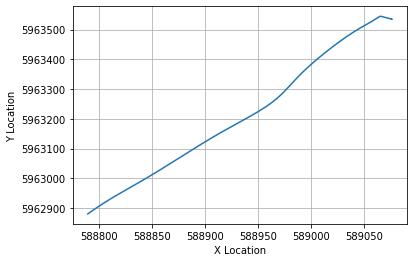

In [21]:
plt.plot(xs, ys)
plt.xlabel('X Location')
plt.ylabel('Y Location')
plt.ticklabel_format(style='plain')
plt.grid()

In [22]:
from mpl_toolkits.mplot3d import Axes3D


In [23]:
# Enable 3D Ploting
%matplotlib widget


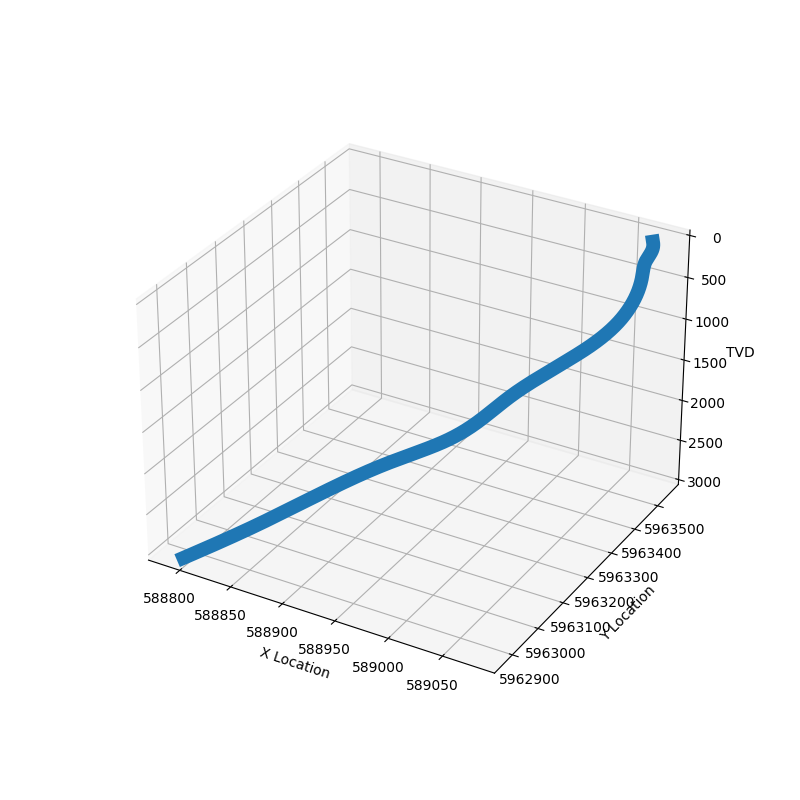

In [24]:
fig = plt.figure(figsize=(8, 8))

ax = plt.axes(projection='3d')
ax.plot3D(xs, ys, zs, lw=10)
ax.set_zlim(3000, 0)

ax.set_xlabel('X Location')
ax.set_ylabel('Y Location')
ax.set_zlabel('TVD')

plt.ticklabel_format(style='plain')
plt.show()

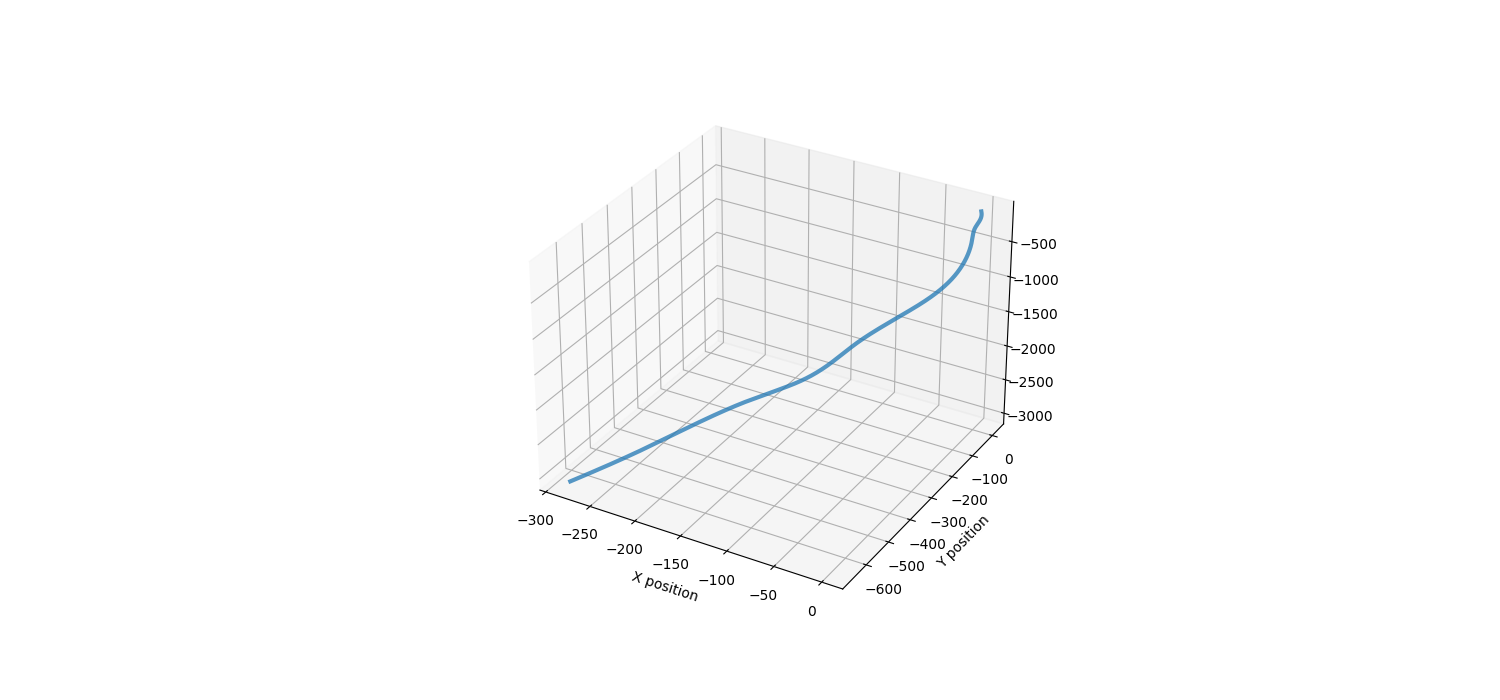

In [25]:
data.location.plot_3d()